In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Study2bLinearRegressionData.csv')
print(data)

   Subject  Gender  Group  STAI_CHANGE  Age       vWTP  WTPsignesMarketChange  \
0     '01'       2      0            4   28   3.750000              -0.324926   
1     '02'       1      1            6   20  -0.050000               0.094329   
2     '04'       1      1           15   20  -0.914573               6.314095   
3     '05'       2      0            0   33   5.253807              -0.655802   
4     '06'       2      1            5   32   1.650273              -0.226537   
5     '07'       1      0           -2   19   9.477987              -0.782589   
6     '09'       2      0           -2   29  -0.512563              -0.027957   
7     '10'       1      1           11   22  11.555000              -0.926557   
8     '11'       2      1            6   22   7.621212              12.493112   
9     '12'       1      0           -2   20   0.186869              -0.028415   
10    '13'       2      1            9   22  -0.281407              -0.000617   
11    '14'       1      0   

In [4]:
data = data.dropna()
data.describe()

,Gender,Group,STAI_CHANGE,Age,vWTP,WTPsignesMarketChange,WTPabsMarketChange
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1.416667,0.500000,3.500000,22.708333,3.272232,1.152707,1.062964
std,0.498224,0.505291,4.476891,4.222323,9.495732,3.105085,3.642526
min,1.000000,0.000000,-3.000000,19.000000,-48.201117,-1.456725,-15.325246
25%,1.000000,0.000000,0.000000,20.000000,0.052937,-0.244293,-0.003275
50%,1.000000,0.500000,3.000000,20.500000,1.800000,0.003407,0.148469
75%,2.000000,1.000000,6.250000,23.500000,6.732407,0.601672,1.764203
max,2.000000,1.000000,15.000000,34.000000,22.092308,12.732636,10.808173


In [5]:
for key in data.keys():
    print(key,"length of unique values:",len(set(data[key].tolist())))

Subject length of unique values: 48
Gender length of unique values: 2
Group length of unique values: 2
STAI_CHANGE length of unique values: 15
Age length of unique values: 13
vWTP length of unique values: 48
WTPsignesMarketChange length of unique values: 48
WTPabsMarketChange length of unique values: 48


/tmp/ipykernel_38536/3515656466.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(),cmap="YlGnBu")


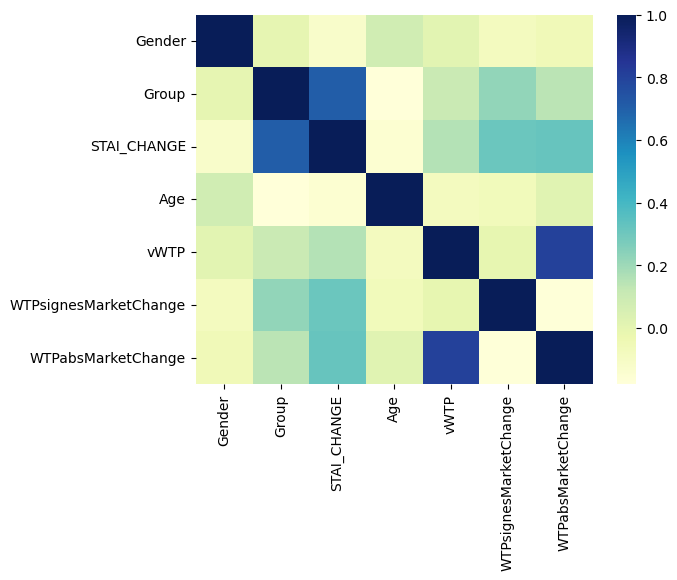

In [6]:
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu")
plt.show()

In [7]:
X=data
Y=data["vWTP"]
X = X.drop(['WTPabsMarketChange',"WTPsignesMarketChange","vWTP","Subject"], axis=1)

In [8]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,8.264248,Age
0,8.126544,Gender
1,4.019280,Group
2,3.292777,STAI_CHANGE


In [9]:
for f in X.columns:
    X[f] = (X[f] - X[f].mean()) / X[f].std()

WTPabsmarketchange = β0 + β1* Trait Anxiety score + β2*Age + β3*Gender 

In [10]:
x = sm.add_constant(X)
multi_model1 = sm.OLS(Y, x).fit()
print(multi_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   vWTP   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.061
Method:                 Least Squares   F-statistic:                    0.3221
Date:                Sat, 06 May 2023   Prob (F-statistic):              0.862
Time:                        18:50:19   Log-Likelihood:                -174.94
No. Observations:                  48   AIC:                             359.9
Df Residuals:                      43   BIC:                             369.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.2722      1.412      2.318      

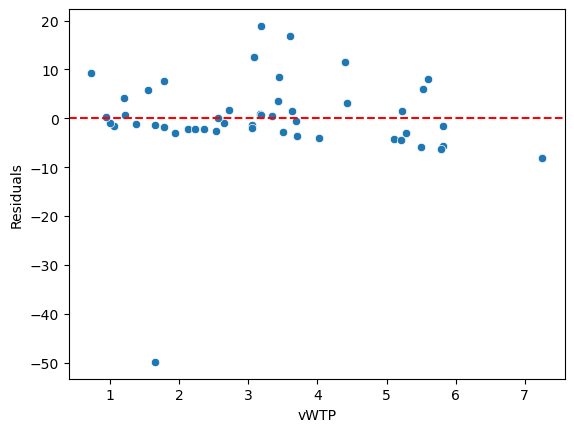

In [11]:
sns.scatterplot(x=multi_model1.fittedvalues, y=multi_model1.resid)

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Add axis labels
plt.xlabel('vWTP')
plt.ylabel('Residuals')

# Show the plot
plt.show()

Q-Q Plot

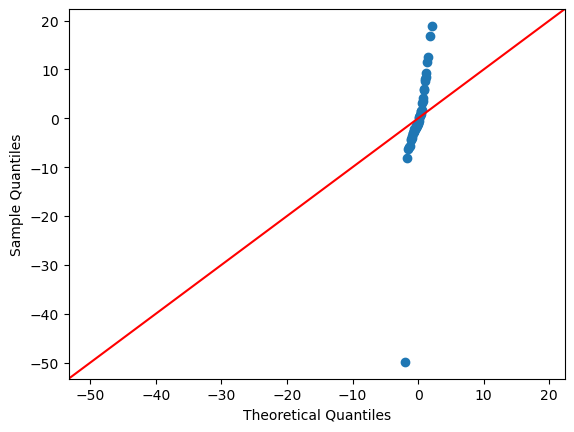

In [12]:
fig = sm.qqplot(multi_model1.resid, line='45')
plt.show()

In [13]:
white_test = het_white(multi_model1.resid,  multi_model1.model.exog)
labels = ["Test Statistic", "Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, white_test)))

{'Test Statistic': 6.142034602979733, 'Test p-value': 0.9087534019144811, 'F-Statistic': 0.42797750492907316, 'F-Test p-value': 0.9412836402662595}


White’s test uses the following null and alternative hypotheses:

    Null (H0): Homoscedasticity is present (residuals are equally scattered)
    Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

Here p value is 0.908, which is less than 0.05. 